<a href="https://colab.research.google.com/github/dellaapw/Homework-Rakamin_Della-APW/blob/main/(Practice)_Machine_Learning_Machine_Maintenance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv(r'/content/maintenance_data.csv')
df

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
0,71,84.529522,64.759347,103.099870,TeamA,Provider4,0
1,34,119.393648,149.045408,74.840419,TeamA,Provider2,0
2,91,113.555924,164.655899,98.436911,TeamC,Provider1,1
3,80,84.986507,89.756964,99.996029,TeamB,Provider3,0
4,40,116.833675,53.141744,69.761985,TeamA,Provider2,0
...,...,...,...,...,...,...,...
995,59,93.988129,128.218946,75.580250,TeamC,Provider4,0
996,60,110.986141,196.596186,118.183418,TeamC,Provider2,0
997,30,106.454824,163.596531,85.874032,TeamC,Provider2,0
998,42,87.407823,74.250715,80.851128,TeamC,Provider4,0


In [ ]:
# df = df_synthetic.copy()

In [ ]:
df.shape

(1000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   pressureInd     1000 non-null   float64
 2   moistureInd     1000 non-null   float64
 3   temperatureInd  1000 non-null   float64
 4   team            1000 non-null   object 
 5   provider        1000 non-null   object 
 6   broken          1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [ ]:
print(df['team'].unique())
print(df['provider'].unique())

['TeamA' 'TeamC' 'TeamB']
['Provider4' 'Provider2' 'Provider1' 'Provider3']


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,lifetime,pressureInd,moistureInd,temperatureInd,broken
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,59.870000,99.878974,128.432036,89.786965,0.126000
std,23.178446,11.727663,44.175460,17.243057,0.332015
min,20.000000,80.185281,50.020204,60.000698,0.000000
25%,39.750000,89.308255,91.350645,74.850294,0.000000
50%,61.000000,99.907410,130.450195,90.014166,0.000000
75%,80.000000,109.580541,167.217104,104.544616,0.000000
max,99.000000,119.976549,199.967515,119.973462,1.000000


- The range between Q3 and max in moistureid is too far, it may have the outliers

## Data Preparation

In [ ]:
#Checking missing value

df.isnull().sum()

,0
lifetime,0
pressureInd,0
moistureInd,0
temperatureInd,0
team,0
provider,0
broken,0


In [ ]:
#Checking the skewness

# df['col'].skew()

-0.06658085795992397

In [ ]:
#Filling missing values

# df.pressureInd.fillna(df.pressureInd.median(), inplace=True)
# df.temperatureInd.fillna(df.temperatureInd.mean(), inplace=True)
# df.moistureInd.fillna(df.moistureInd.median(), inplace=True)
# df.lifetime.fillna(df.lifetime.mean(), inplace=True)
# # print(df.isnull().sum())

<Axes: xlabel='moistureInd'>

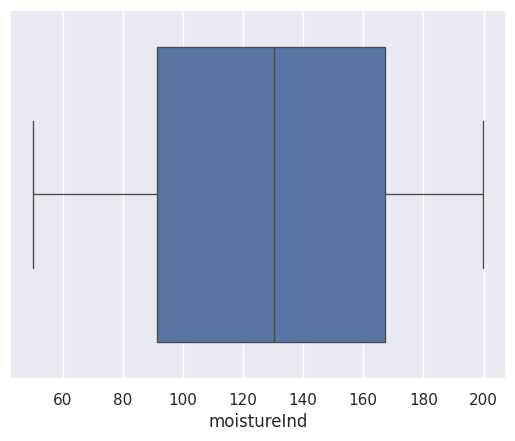

In [ ]:
#Checking the outliers
sns.boxplot(x=df.moistureInd)

### Removing outliers using IQR

In [ ]:
import numpy as np

# Calculate Q1, Q3, and IQR
Q1, Q3 = np.percentile(df.moistureInd, [25, 75])
IQR = Q3 - Q1

# Print the results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 91.350645465
Q3: 167.217103675
IQR: 75.86645821


In [ ]:
Q1

91.350645465

In [ ]:
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(lower_bound)
print(upper_bound)

-22.44904185
281.01679099


In [ ]:
outliers = df[(df.moistureInd < lower_bound) | (df.moistureInd>upper_bound)]
outliers.count()

,0
lifetime,0
pressureInd,0
moistureInd,0
temperatureInd,0
team,0
provider,0
broken,0


In [ ]:
df_new = df.drop(outliers.index)
df_new.shape

(1000, 7)

## Exploratory Analysis

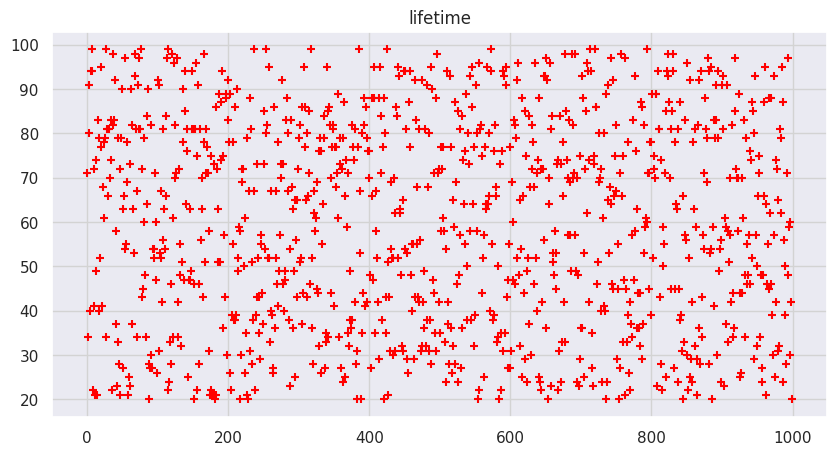

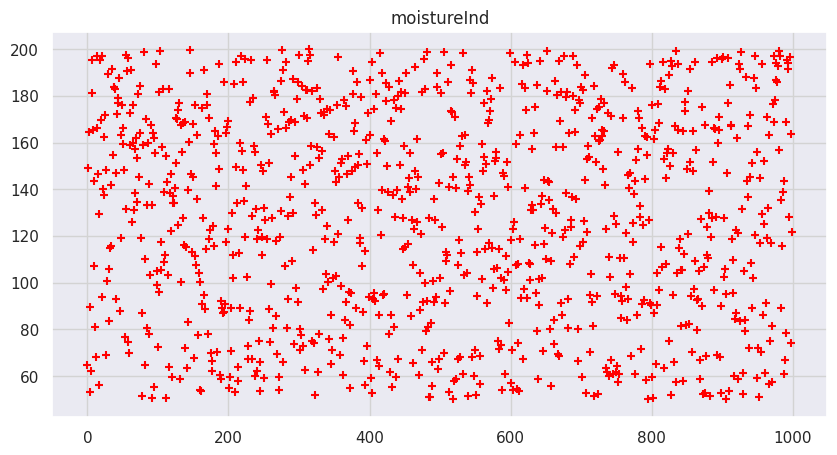

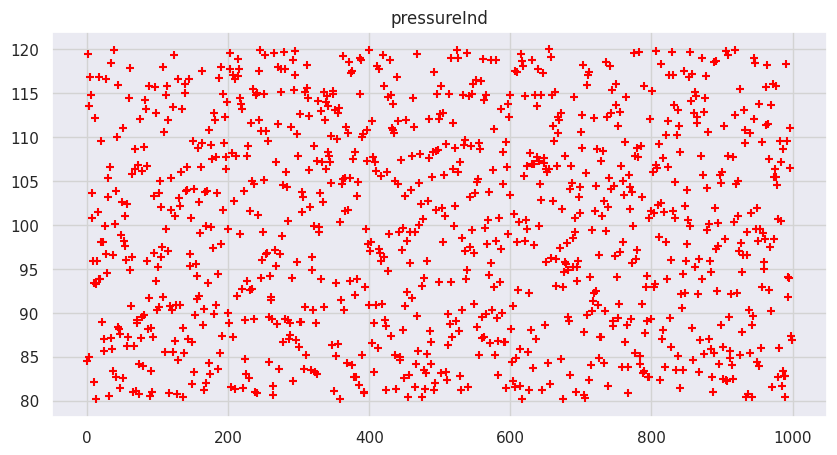

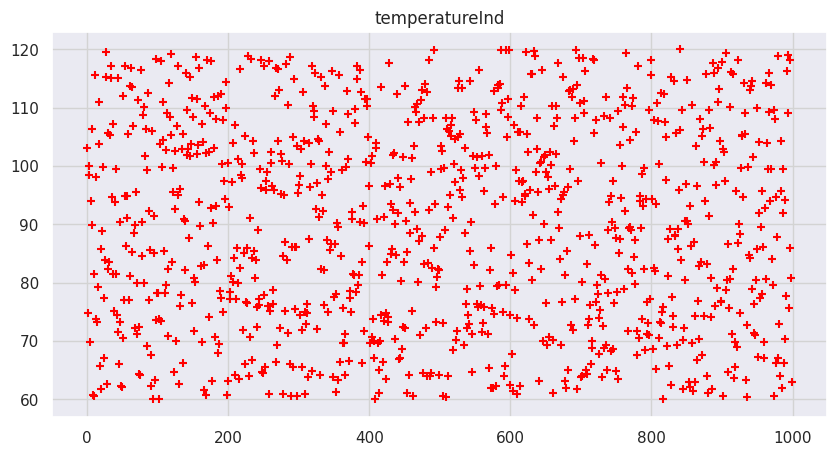

In [ ]:
for col in ['lifetime', 'moistureInd', 'pressureInd', 'temperatureInd']:
    plt.figure(figsize=(10,5))
    plt.scatter(np.arange(1000), df_new[col], marker='+', color='red')
    plt.title(col)
    plt.grid(linewidth=1, color='lightgrey')
    plt.show()

<ipython-input-167-0e0373701d2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='broken', data=df, palette='pastel')


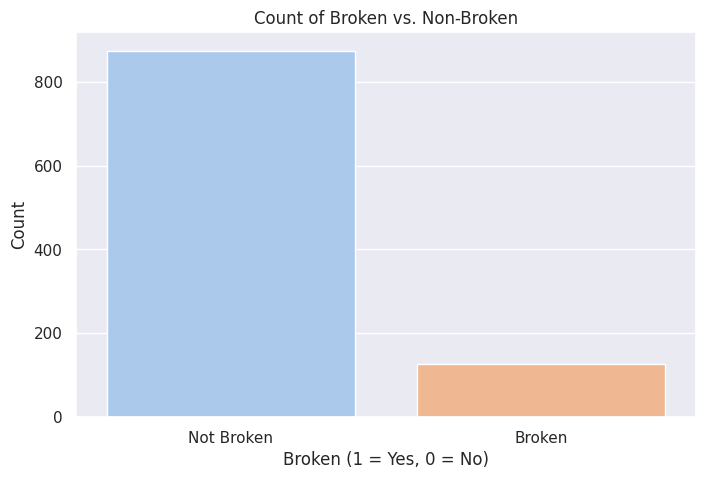

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='broken', data=df, palette='pastel')
plt.title('Count of Broken vs. Non-Broken')
plt.xlabel('Broken (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Broken', 'Broken'])
plt.show()

<ipython-input-168-9ea633f5d8d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_new[col], palette='ch:7', edgecolor= 'white', linewidth=5)


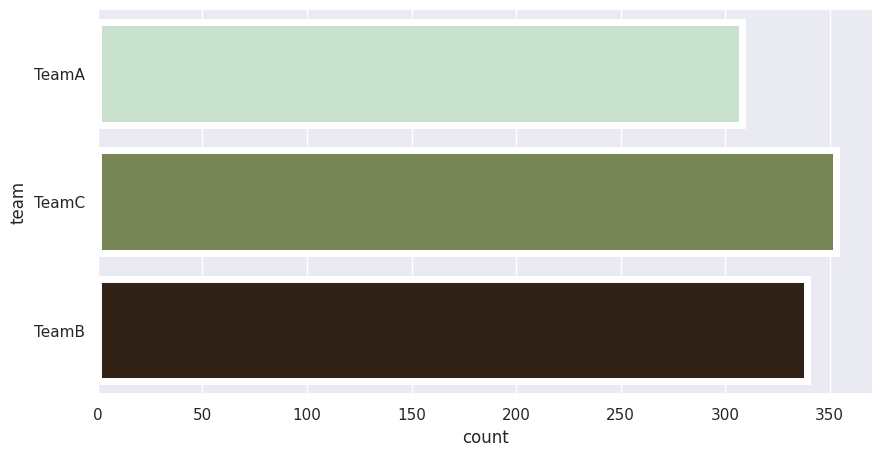

<ipython-input-168-9ea633f5d8d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_new[col], palette='ch:7', edgecolor= 'white', linewidth=5)


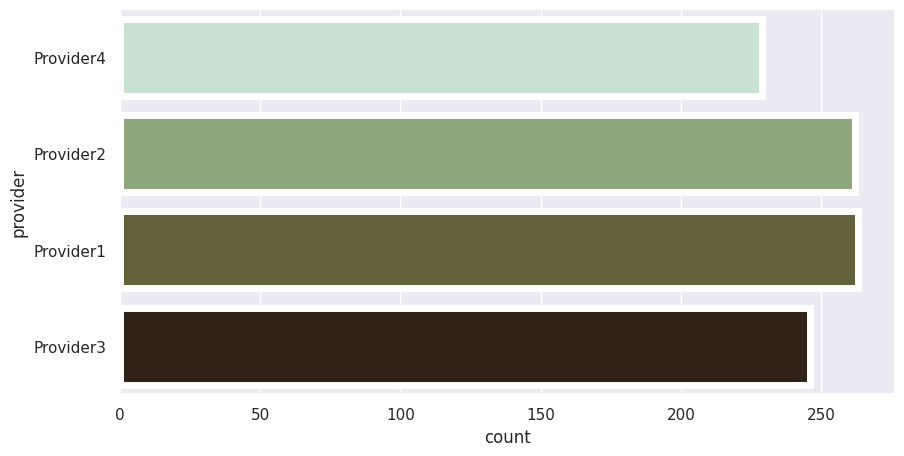

In [ ]:
for col in ['team', 'provider']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.show()

<ipython-input-143-29064ba89549>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==0], color='dodgerblue')
<ipython-input-143-29064ba89549>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==1], color='green')


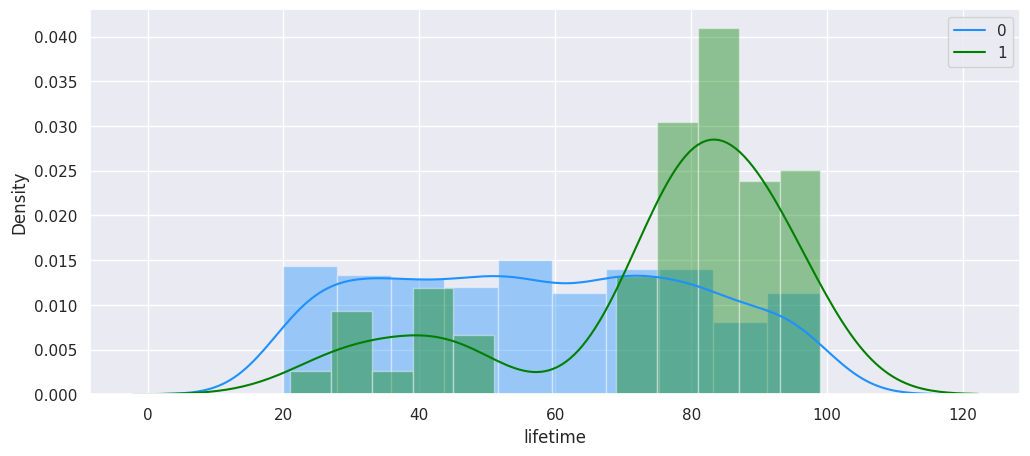

<ipython-input-143-29064ba89549>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==0], color='dodgerblue')
<ipython-input-143-29064ba89549>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==1], color='green')


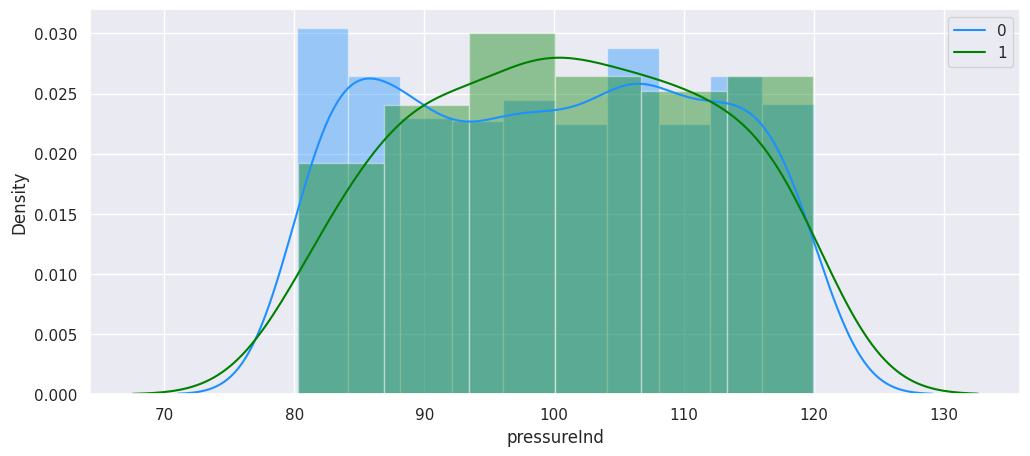

<ipython-input-143-29064ba89549>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==0], color='dodgerblue')
<ipython-input-143-29064ba89549>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==1], color='green')


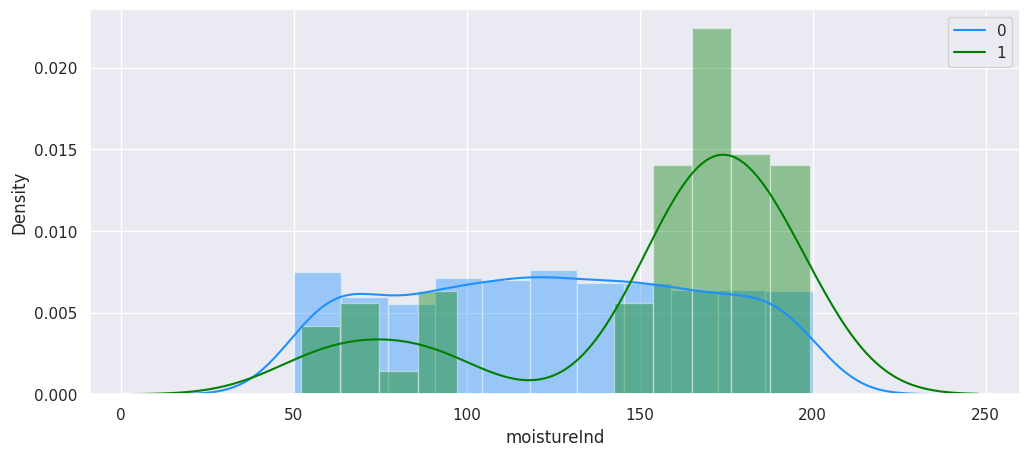

<ipython-input-143-29064ba89549>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==0], color='dodgerblue')
<ipython-input-143-29064ba89549>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col][df.broken==1], color='green')


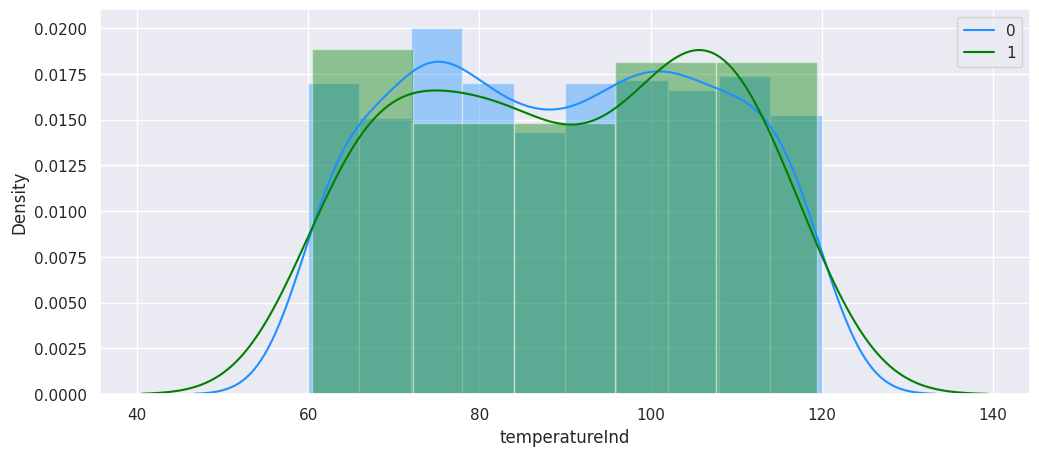

In [ ]:
for col in ['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd']:
    plt.figure(figsize=(12,5))
    sns.distplot(df_new[col][df.broken==0], color='dodgerblue')
    sns.distplot(df_new[col][df.broken==1], color='green')
    plt.legend(['0','1'])
    sns.set_style('darkgrid')
    plt.show()

<ipython-input-145-bdf586347255>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_new[col][df_new['broken']==1], palette='ch:7', edgecolor= 'white', linewidth=5)


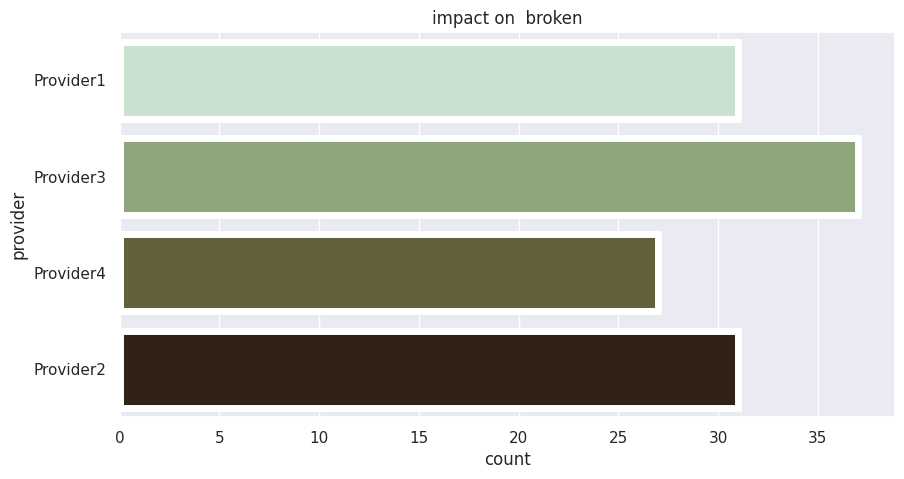

<ipython-input-145-bdf586347255>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_new[col][df_new['broken']==1], palette='ch:7', edgecolor= 'white', linewidth=5)


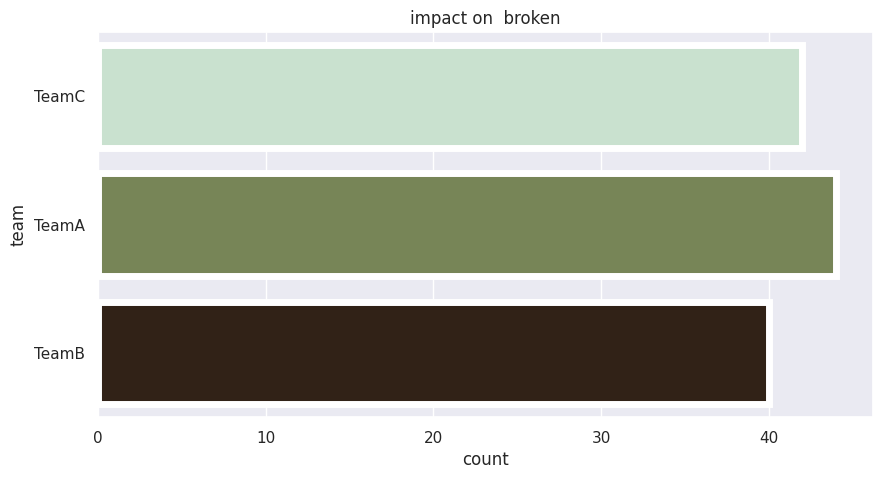

<ipython-input-145-bdf586347255>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_new[col][df_new.broken==0], palette='ch:9', edgecolor='white', linewidth=5)


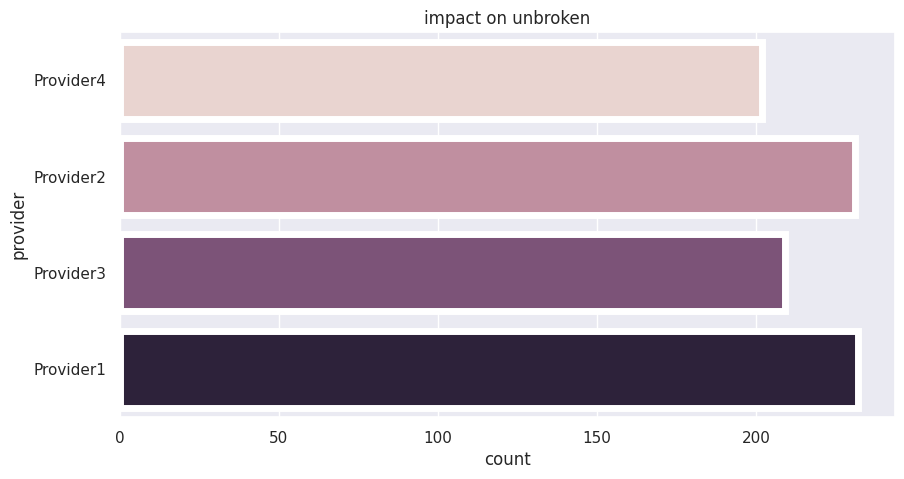

<ipython-input-145-bdf586347255>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_new[col][df_new.broken==0], palette='ch:9', edgecolor='white', linewidth=5)


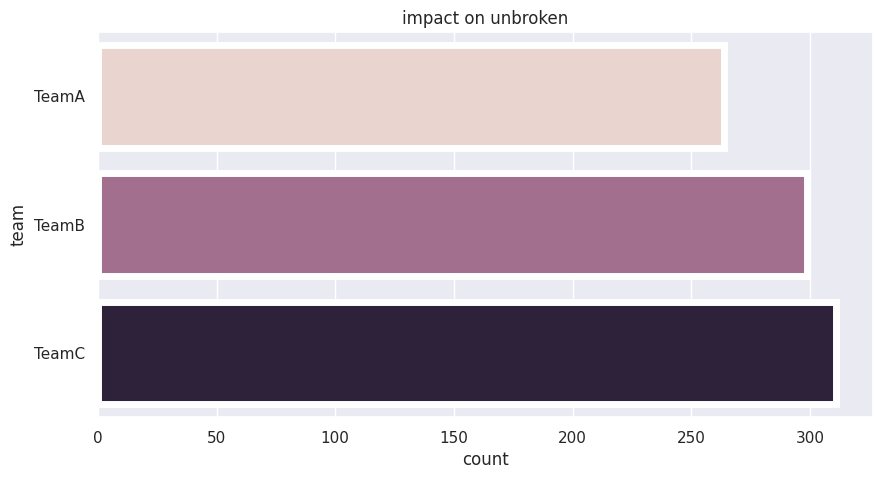

In [ ]:
for col in ['provider', 'team']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col][df_new['broken']==1], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.title('impact on  broken')
    plt.show()
for col in ['provider', 'team']:
    plt.figure(figsize=(10,5))
    sns.countplot(df_new[col][df_new.broken==0], palette='ch:9', edgecolor='white', linewidth=5)
    sns.set(style='darkgrid')
    plt.title('impact on unbroken')
    plt.show()

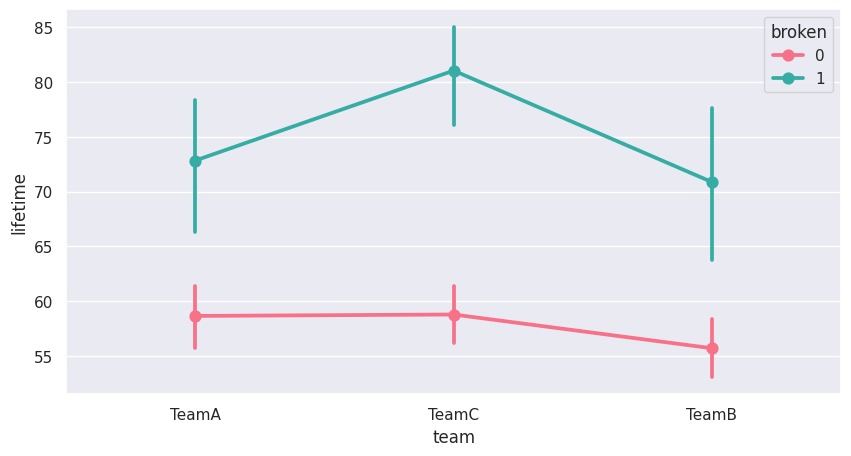

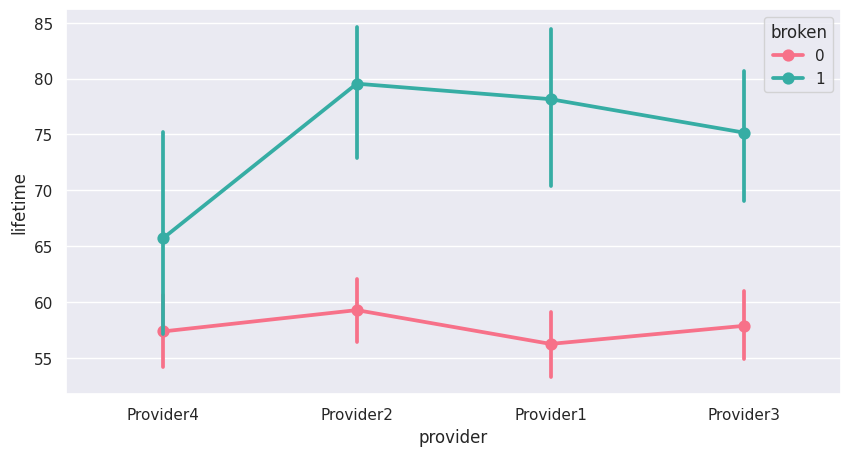

In [ ]:
for col in ['team', 'provider']:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=col, y=df_new['lifetime'], hue='broken', data=df_new, palette=('husl'))
    sns.set(style='darkgrid')
    plt.show()

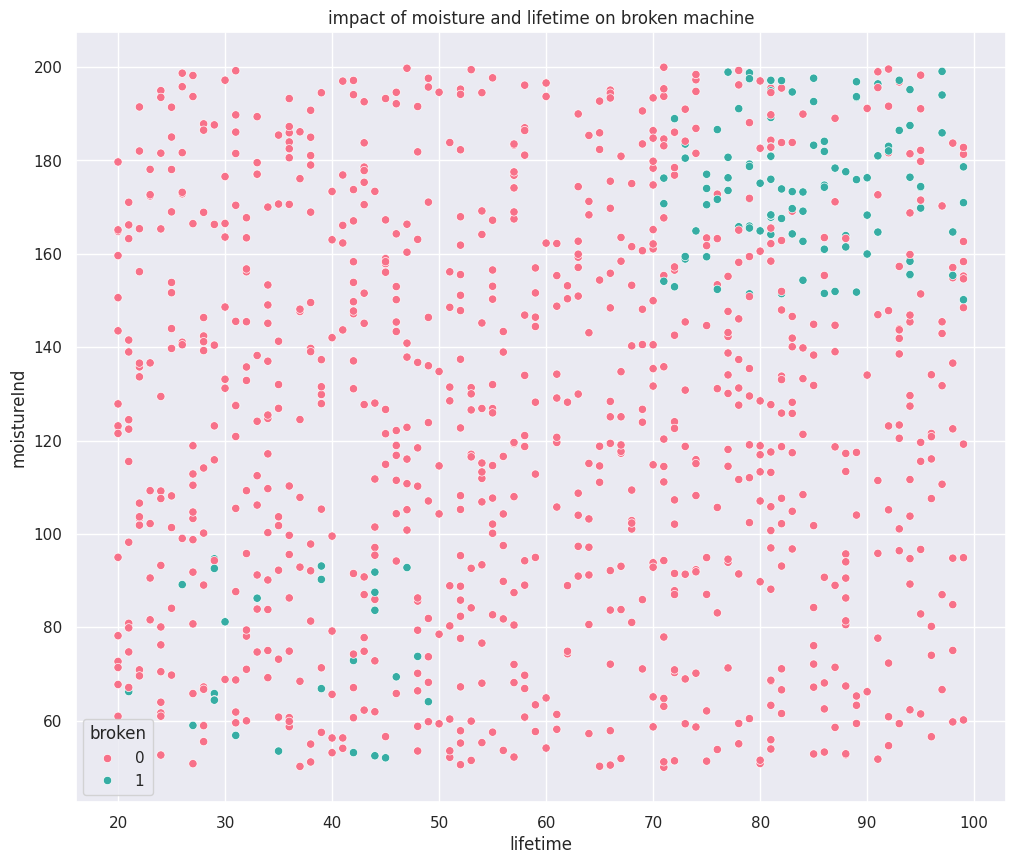

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='lifetime', y='moistureInd', hue='broken', data=df_new, palette=('husl'))
plt.title('impact of moisture and lifetime on broken machine')
plt.show()

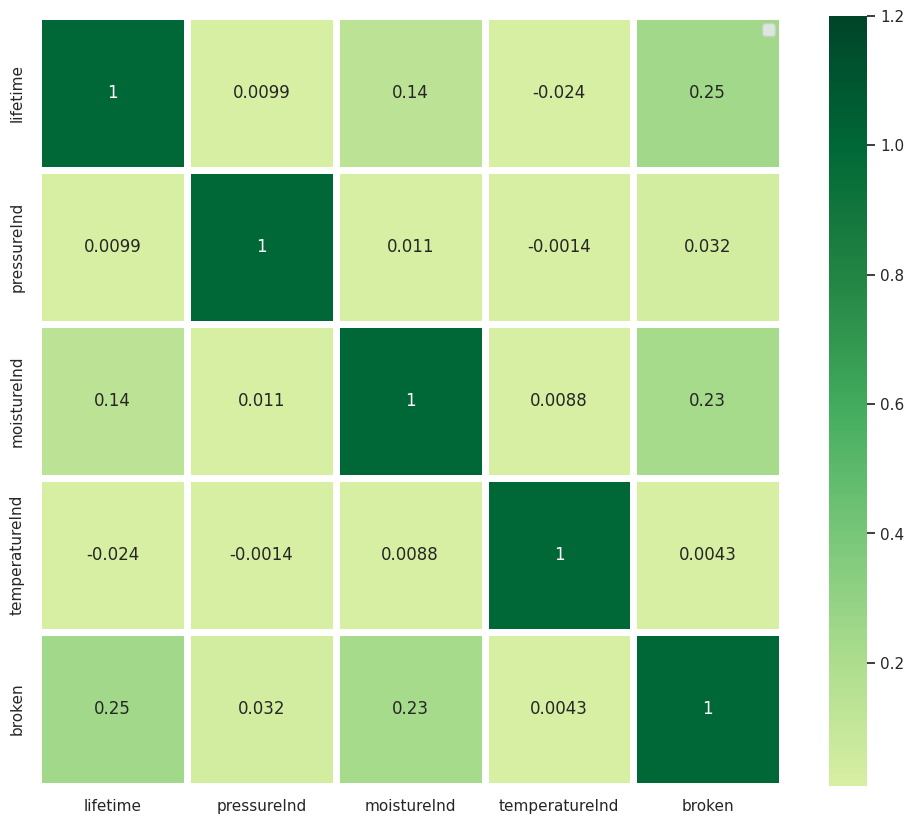

In [ ]:
numeric_columns = df_new.select_dtypes(include=[np.number])
corr=numeric_columns.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, linewidth=5, cmap='YlGn', center=0.4, vmin=0.01, vmax=1.2)
plt.legend('Correlation Between Each Feature')

## Building model

In [ ]:
dummies = pd.get_dummies(df_new[['team','provider']])
dummies

,team_TeamA,team_TeamB,team_TeamC,provider_Provider1,provider_Provider2,provider_Provider3,provider_Provider4
0,True,False,False,False,False,False,True
1,True,False,False,False,True,False,False
2,False,False,True,True,False,False,False
3,False,True,False,False,False,True,False
4,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...
995,False,False,True,False,False,False,True
996,False,False,True,False,True,False,False
997,False,False,True,False,True,False,False
998,False,False,True,False,False,False,True


In [ ]:
df_new_merged=pd.concat([df_new, dummies], axis=1)
df_new_merged

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken,team_TeamA,team_TeamB,team_TeamC,provider_Provider1,provider_Provider2,provider_Provider3,provider_Provider4
0,71,84.529522,64.759347,103.099870,TeamA,Provider4,0,True,False,False,False,False,False,True
1,34,119.393648,149.045408,74.840419,TeamA,Provider2,0,True,False,False,False,True,False,False
2,91,113.555924,164.655899,98.436911,TeamC,Provider1,1,False,False,True,True,False,False,False
3,80,84.986507,89.756964,99.996029,TeamB,Provider3,0,False,True,False,False,False,True,False
4,40,116.833675,53.141744,69.761985,TeamA,Provider2,0,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,93.988129,128.218946,75.580250,TeamC,Provider4,0,False,False,True,False,False,False,True
996,60,110.986141,196.596186,118.183418,TeamC,Provider2,0,False,False,True,False,True,False,False
997,30,106.454824,163.596531,85.874032,TeamC,Provider2,0,False,False,True,False,True,False,False
998,42,87.407823,74.250715,80.851128,TeamC,Provider4,0,False,False,True,False,False,False,True


In [ ]:
final=df_new_merged.drop(['team_TeamC','provider_Provider4'], axis='columns')

In [ ]:
final.drop(['team','provider'], axis='columns')

,lifetime,pressureInd,moistureInd,temperatureInd,broken,team_TeamA,team_TeamB,provider_Provider1,provider_Provider2,provider_Provider3
0,71,84.529522,64.759347,103.099870,0,True,False,False,False,False
1,34,119.393648,149.045408,74.840419,0,True,False,False,True,False
2,91,113.555924,164.655899,98.436911,1,False,False,True,False,False
3,80,84.986507,89.756964,99.996029,0,False,True,False,False,True
4,40,116.833675,53.141744,69.761985,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
995,59,93.988129,128.218946,75.580250,0,False,False,False,False,False
996,60,110.986141,196.596186,118.183418,0,False,False,False,True,False
997,30,106.454824,163.596531,85.874032,0,False,False,False,True,False
998,42,87.407823,74.250715,80.851128,0,False,False,False,False,False


In [ ]:
x = final[['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd', 'team_TeamA', 'team_TeamB', 'provider_Provider1', 'provider_Provider2', 'provider_Provider3']]
y = final['broken']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 9)
(800, 9)
(200, 9)
(1000,)
(800,)
(200,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.predict([[78,104.911649,104.257296,83.421491,1,0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.score(x_test,y_test)

0.865

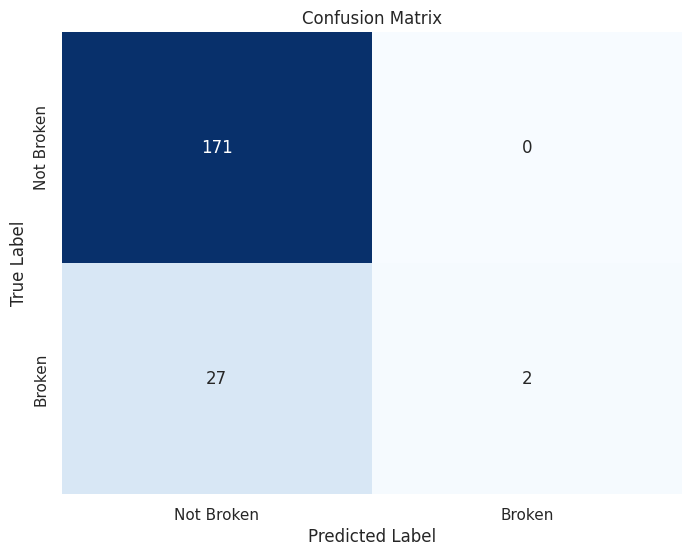

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Broken', 'Broken'],
            yticklabels=['Not Broken', 'Broken'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()